<a href="https://colab.research.google.com/github/gemunsell/CIS2350/blob/main/Sleep_and_Productivity_Poisson_Reg_Grace_Munsell_(CIS_2350).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas statsmodels


Saving sleep_cycle_productivity.csv to sleep_cycle_productivity (2).csv
                 Generalized Linear Model Regression Results                  
Dep. Variable:     Productivity Score   No. Observations:                 5000
Model:                            GLM   Df Residuals:                     4991
Model Family:                 Poisson   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12644.
Date:                Sun, 23 Feb 2025   Deviance:                       8141.6
Time:                        02:36:04   Pearson chi2:                 7.30e+03
No. Iterations:                     4   Pseudo R-squ. (CS):           0.001939
Covariance Type:            nonrobust                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------

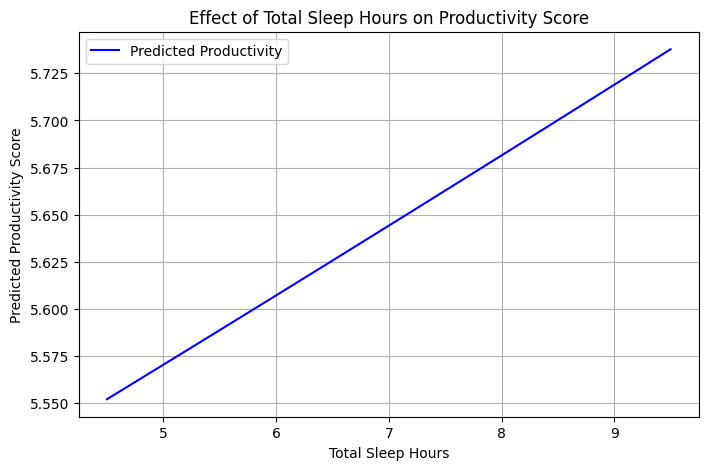

In [3]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

# Upload dataset manually
uploaded = files.upload()

# Read dataset
df = pd.read_csv("sleep_cycle_productivity.csv")

# Define dependent and independent variables
y = df["Productivity Score"]
X = df[["Total Sleep Hours", "Sleep Quality", "Exercise (mins/day)", "Caffeine Intake (mg)",
        "Screen Time Before Bed (mins)", "Work Hours (hrs/day)", "Mood Score", "Stress Level"]]

# Add constant term to predictor variables for statsmodels
X = sm.add_constant(X)

# Fit Poisson regression model
poisson_model = sm.GLM(y, X, family=sm.families.Poisson()).fit()

# Print summary of the model
print(poisson_model.summary())

# Create a range of values for Total Sleep Hours (for visualization)
sleep_hours_range = np.linspace(df["Total Sleep Hours"].min(), df["Total Sleep Hours"].max(), 100)

# Create a DataFrame for prediction (holding other variables at their mean)
X_pred = X.mean()
X_pred = pd.DataFrame([X_pred] * 100)  # Copy the mean values
X_pred["Total Sleep Hours"] = sleep_hours_range

# Predict productivity scores
predicted_productivity = poisson_model.predict(X_pred)

# Plot the relationship
plt.figure(figsize=(8, 5))
plt.plot(sleep_hours_range, predicted_productivity, label="Predicted Productivity", color='blue')
plt.xlabel("Total Sleep Hours")
plt.ylabel("Predicted Productivity Score")
plt.title("Effect of Total Sleep Hours on Productivity Score")
plt.legend()
plt.grid()

# Show the plot
plt.show()
